# Chapter 3: Nonlinear Equations in One Variable

Based on the Matlab <a href='http://www.siam.org/books/cs07/programs.zip'>files</a> for the book <a href='http://www.siam.org/books/cs07/'>A First Course in Numerical Methods</a>, by Ascher and Greif.

Julia version by Michael P. Wathen.

13 Sept 2016


In [4]:
using PyPlot

# Root finding

Code showing real roots of three function: (i) $f(x) = \sin(x) \ on \ [0, 4\pi]$ , (ii) $f(x) = x^3 − 30 x^2 + 2552 \ on \ [0, 20]$ , and (iii) $f(x) = 10\cosh(x/4) − x \ on \ [− 10, 10]$.

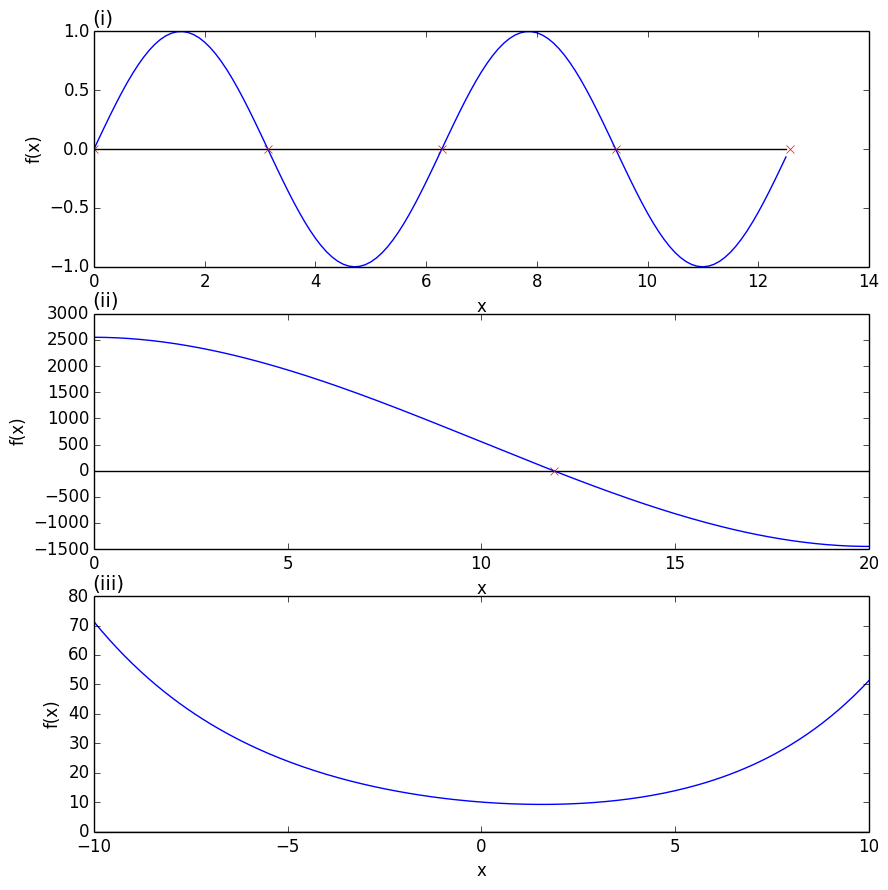

PyObject <matplotlib.text.Text object at 0x320da60d0>

In [7]:
fig = figure("pyplot_subplot_mixed",figsize=(10,10))

t = [0:.1:4*pi];
tt = sin(t);
ax = zeros(length(t));
xrt = [0:pi:4*pi];
yrt = zeros(5);
subplot(3,1,1)
plot(t,tt,"b",t,ax,"k",xrt,yrt,"rx");
title("(i)", loc="left")
xlabel("x")
ylabel("f(x)")

t = [0:.1:20];
tt = t.^3 - 30*t.^2 + 2552;
ax = zeros(length(t));
subplot(3,1,2)
plot(t,tt,"b",t,ax,"k",11.8615,0,"rx");
title("(ii)", loc="left")
xlabel("x")
ylabel("f(x)")

t = [-10:.1:10];
tt = 10 * cosh(t ./4) - t;
ax = zeros(length(t));
subplot(3,1,3)
plot(t,tt,"b",t,ax,"k");
title("(iii)", loc="left")
xlabel("x")
ylabel("f(x)")

## Bisection method

Root finding with the <a href='https://en.wikipedia.org/wiki/Bisection_method'>biscetion method</a>.

In [8]:
function fex3(x)
    return 2.5*sinh(x/4) - 1;
end

function bisect_recursive(func,a,b,fa,fb,atol)

    # function bisect_recursive (func,a,b,fa,fb,atol)

    # Assuming fa = func(a), fb = func(b), and fa*fb < 0,
    # there is a value root in (a,b) such that func(root) = 0.
    # This function returns in p a value such that 
    #      | p - root | < atol

    p = (a+b)/2;
    if b-a < atol
        return p;
    else  
        fp = func(p);
        if fa * fp < 0
        b = p;
        fb = fp;
        else
        a = p;
        fa = fp;
        end
        p = bisect_recursive(func,a,b,fa,fb,atol);
        return p;
    end
end


function bisect(func,a,b,fa,fb,atol)
     
    # function bisect(func,a,b,fa,fb,atol)
    #   
    # Assuming fa = func(a), fb = func(b), and fa*fb < 0,
    # there is a value root in (a,b) such that func(root) = 0.
    # This function returns in p a value such that 
    #      | p - root | < atol
    # and in n the number of iterations required.
    #   

    # check input
    if (a >= b) || (fa*fb >= 0) || (atol <= 0)
      disp("something wrong with the input: quitting");
      p = NaN; n=NaN;
      return
    end

    n = ceil(log2(b-a) - log2(2*atol));
    for k=1:n
        p = (a+b)/2;
        fp = func(p);
        if abs(fp) < 1e-16
            n = k; 
            return p, n;
        end
        if fa*fp < 0
            b = p;
          else
            a = p;
            fa = fp;
        end
    end
    p = (a+b)/2;
    return p, n;
end

x1, n = bisect(fex3,-10,10,fex3(-10),fex3(10),1.0e-10)
x2 = bisect_recursive(fex3,-10,10,fex3(-10),fex3(10),1.0e-10)

@printf "bisect:           [%f, %i]\n" x1 n
@printf "bisect_recursive: [%f]\n" x2

bisect:           [1.560141, 37]
bisect_recursive: [1.560141]


# Fixed-point iteration

Root finding with the <a href='https://en.wikipedia.org/wiki/Fixed-point_iteration'>fixed-point iteration</a>.

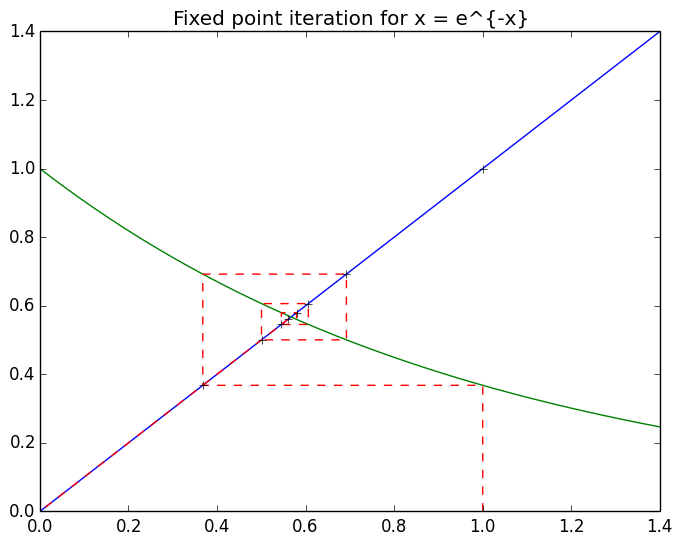


Use "plot(" instead.


PyObject <matplotlib.text.Text object at 0x3238004d0>

In [65]:
x = [0:.01:1.4];
y1 = x;
y2 = exp(-x);
plot (x,y1,x,y2)

n=8; xx = zeros(n); zer = xx;
xx[1] = 1;
for j = 1:n-1
    xx[j+1] = exp(-xx[j]);
end
itx = zeros(2*length(xx))
itx[1:2:2*n-1] = xx;
itx[2:2:2*(n-1)] = xx[1:n-1];
ity = zeros(length(itx))
ity[1] = 0;
ity[2:2:2*(n-1)] = xx[2:n];
ity[3:2:2*n-1] = xx[2:n];
plot(itx,ity,"r--")
plot(xx,zer,"k+")
title("Fixed point iteration for x = e^{-x}")

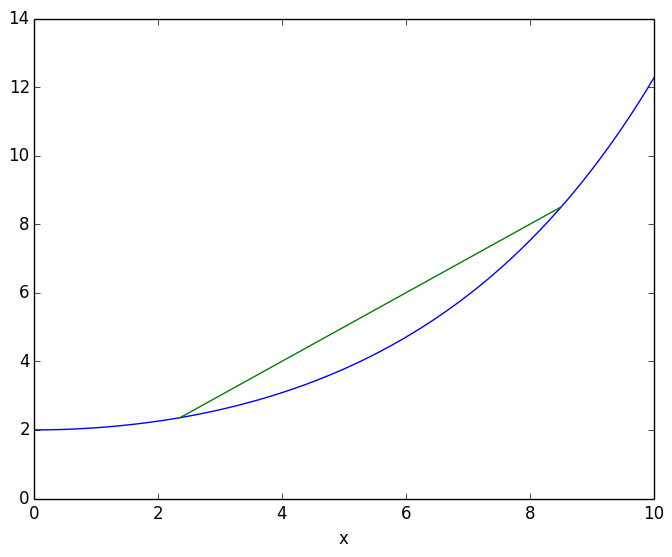

8.507199570713095


1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3232d08d0>

In [54]:
x = [0 10];
plot(x,x,"g")
axis([0., 10., 0., 14.])

x = [0:.01:10];
y = 2*cosh(x/4);
plot(x,y,"b")
xlabel("x")

# find the two points where these curves meet and mark them
a = 2;
for k = 1:4
    a = a - (2*cosh(a/4) - a)/(.5*sinh(a/4)-1);
end
b = 8;
for k = 1:4
    b = b - (2*cosh(b/4) - b)/(.5*sinh(b/4)-1);
end
println(b)
plot([a, b],[a, b],"g")

# Newton's method

Root findin with <a href='https://en.wikipedia.org/wiki/Newton%27s_method'>Newton's method</a>.

2001


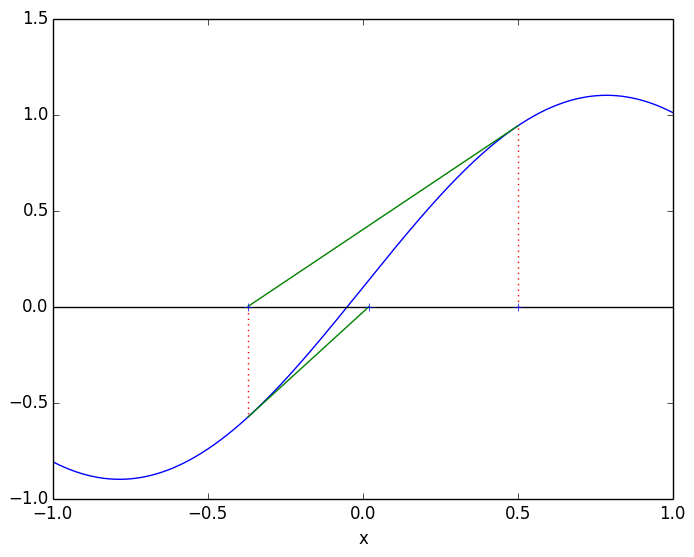


Use "plot(" instead.


1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3247ca1d0>

In [72]:
x=[-1:.001:1];
x0=0.5;
x1=x0-(sin(2*x0)+0.1)/(2*cos(2*x0));
x2=x1-(sin(2*x1)+0.1)/(2*cos(2*x1));
axis([-1, 1, -1, 1.5])
plot(x,sin(2*x)+0.1, "b")
xlabel("x")

plot(linspace(-1,1),linspace(0,0),"k");
plot(linspace(x0,x1),linspace(sin(2*x0)+0.1,0),"g");
plot(linspace(x1,x2),linspace(sin(2*x1)+0.1,0),"g");

plot(linspace(x0,x0),linspace(0,sin(2*x0)+0.1),"r:");
plot(linspace(x1,x1),linspace(0,sin(2*x1)+0.1),"r:");

plot ([x0,x1,x2],[0,0,0],"+")